In [1]:
from IPython.display import HTML, IFrame, Image

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
from matplotlib import rcParams
rcParams['grid.linewidth'] = 0

# Visualizing Big Datasets: Tools, Pitfalls, Experimental Example

## Importance of Data Visualization - NYC Taxi pick-upp data

<img src="./images/nyc_pickups_vs_dropoffs.jpg"  width="900" height="900"/>

## Plotting very large datasets meaningfully

- provides clealear understanding
- aids decision making 

You can not examine all the points yourself!

When working with large datasets, visualizations are often the only way available to understand the properties of that dataset -- there are simply too many data points to examine each one!  Thus it is very important to be aware of some common plotting problems that are minor inconveniences with small datasets but very serious problems with larger ones.

<img src="./images/6-blind-men-hans.jpg"  width="700" height="700"/>


<img src="./images/data_science_process.png"  width="500" height="500"/>

<img src="./images/index.jpeg"  width="500" height="500"/> 
<img src="./images/python-graph-gallery1-609.jpg"  width="500" height="500"/>
https://python-graph-gallery.com/

# Presentation Outine:
- Tools introduction
- Ratcave VR Acuity introduction
- Pitfalls of Large Datasets Vizualization with Real Data Example

# Tools: Pandas, Seaborn, Datashader

![Image](./images/pandas.png)

Python Library providing high-performance data manipulation and analysis tool using its powerful data structures

Key Features of Pandas:
- Fast and efficient DataFrame object with default and customized indexing.
- Loading data into in-memory data objects from different file formats.
- Data alignment and handling of missing data.
- Reshaping, operations on columns
- Label-based slicing, indexing and subsetting of large data sets.
- Group by data, mergeging and joining of data
- Time Series functionality.


In [3]:
import pandas as pd

In [4]:
# Creating structured dataset
data = pd.DataFrame(np.random.randn(500,3), columns=list('XYZ'))
data

,X,Y,Z
0,-1.404170,0.114512,1.254152
1,1.189592,-1.140142,1.736201
2,1.706299,0.528152,-0.450680
3,1.589957,1.037004,0.698966
4,1.284791,1.279371,0.028194
5,1.047938,0.901777,1.204611
6,-0.733735,-0.922846,1.468810
7,0.001692,0.203503,1.215376
8,1.416405,-0.151846,-1.306256
9,0.021177,-0.305875,0.857540


In [5]:
## Columns operations
data.X = data.X * 20
data

,X,Y,Z
0,-28.083407,0.114512,1.254152
1,23.791847,-1.140142,1.736201
2,34.125978,0.528152,-0.450680
3,31.799139,1.037004,0.698966
4,25.695819,1.279371,0.028194
5,20.958758,0.901777,1.204611
6,-14.674700,-0.922846,1.468810
7,0.033849,0.203503,1.215376
8,28.328095,-0.151846,-1.306256
9,0.423533,-0.305875,0.857540


In [29]:
## Adding new label
x = np.array([[1,2,3,4,5]])
data['label'] = np.repeat(x, 100)

data.head()
# data.tail()

,X,Y,Z,New,label
0,-28.083407,0.114512,1.254152,0.018078,1
1,23.791847,-1.140142,1.736201,0.920196,1
2,34.125978,0.528152,-0.450680,0.335671,1
3,31.799139,1.037004,0.698966,0.086215,1
4,25.695819,1.279371,0.028194,0.953112,1


<img src='./images/seaborn.png'  width="1000" height="1000"/>

Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

Some of the features of seaborn:
- Functions for visualizing univariate and bivariate distributions or for comparing them between subsets of data
- Tools that fit and visualize linear regression models for different kinds of independent and dependent variables
- Functions that visualize matrices of data and use clustering algorithms to discover structure in those matrices
- High-level abstractions for structuring grids of plots that let you easily build complex visualizations
- Several built-in themes for styling matplotlib graphics
- Tools for choosing color palettes to make beautiful plots that reveal patterns in your data

In [7]:
import seaborn as sns

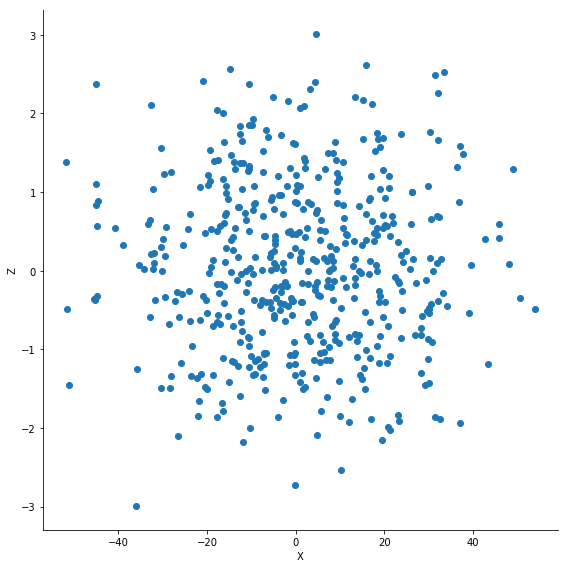

In [22]:
g = sns.FacetGrid(data=data, size=8)
g.map(plt.scatter, 'X', 'Z')

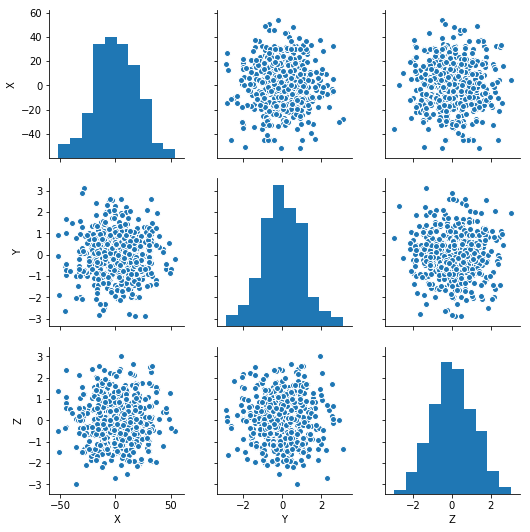

In [18]:
sns.pairplot(data=data, vars=['X', 'Y', 'Z'] );

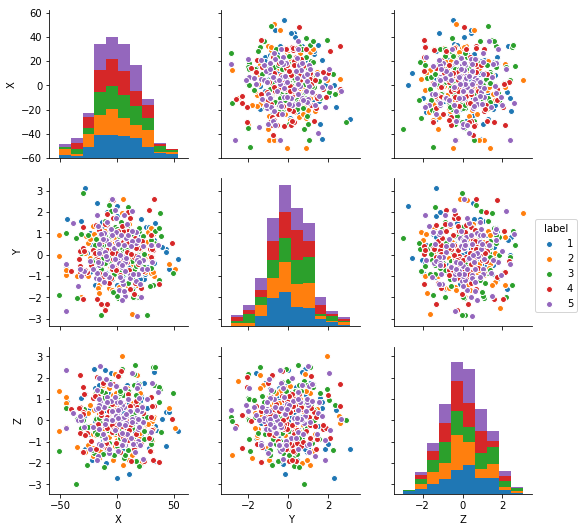

In [40]:
## Adding hue
sns.pairplot(data=data, vars=['X', 'Y', 'Z'], hue='label');

<img src='./images/datashader.png'  width="400" height="400"/>

Datashader is a data rasterization pipeline for automating the process of creating meaningful representations of large amounts of data. Datashader breaks the creation of images of data into 3 main steps:

1. Projection - Each record is projected into zero or more bins of a nominal plotting grid shape, based on a specified glyph.

2. Aggregation - Reductions are computed for each bin, compressing the potentially large dataset into a much smaller aggregate array.

3. Transformation - These aggregates are then further processed, eventually creating an image.

Using this very general pipeline, many interesting data visualizations can be created in a performant and scalable way. Datashader contains tools for easily creating these pipelines in a composable manner, using only a few lines of code. Datashader can be used on its own, but it is also designed to work as a pre-processing stage in a plotting library, allowing that library to work with much larger datasets than it would otherwise.

## Ratcave Virtual Reality: Acuity Measurment Project
![Image](./images/rat1.gif)

# Dataset explenation: position and orientation 
<img src='./images/position.png'  width="400" height="500"/> | <img src="./images/spherical_coordinates.png"  width="500" height="500"/>

## What are we looking for: Stimuli Related Behavior
<img src='./images/ratSRB.gif'  width="500" height="500"/>

# Pitfalls of Large Datasets Vizualization
## Goal: Reveal the Underlaying Dataset

## Loading The Dataset
Another feature of pandas in practice. 

In [ ]:
path = 'data/'

dfrat     = pd.read_hdf(path+'relationalDatabase.h5', 'Rat_Behavior').set_index('index')
dfevent   = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')

dfrat.head()

In [ ]:
dfrat.describe()

In [ ]:
## Taking the subsection - just for the sake of plotting speed
mask = dfrat.session_id == 0
rat = dfrat[mask]
rat.head()

In [ ]:
mask2 = (dfrat.session_id == 1) | (dfrat.session_id == 2)
rat2 = dfrat[mask2]

rat2.head(2)

In [ ]:
g = sns.FacetGrid(data=rat, size=8)
g.map(plt.scatter,'X_Pos','Z_Pos');

## Overplotting 

- 2 x 2D subsets - two separate experiments, plotted togheter

In [ ]:
g = sns.FacetGrid(data=rat2, size=6, hue='session_id')
g.map(plt.scatter,'X_Pos','Z_Pos');
plt.legend()

g = sns.FacetGrid(data=rat2, size=6, hue='session_id', hue_order=[2,1])
g.map(plt.scatter,'X_Pos','Z_Pos');
plt.legend()

## Apperance depeneds on which one is plotted first!
Occlusion of Data -> points plotted on top of one another

# Oversaturation 

Reduce the problem of overplotting by using the transparency parameter. **Alpha**.
- if we set alpha=0.1 we need ten points for the color too saturate 

In [ ]:
g = sns.FacetGrid(data=rat, size=6)
g.map(plt.scatter,'X_Pos','Z_Pos', alpha=0.1);

In [ ]:
g = sns.FacetGrid(data=rat, size=6)
g.map(plt.scatter,'X_Pos','Z_Pos', alpha=0.01);

+ reduced the effect of points overlap
- but it is now harder to see the individual points 
- we can still see the oversaturation problem, in every point where 

## What else can we do?

## Add another Hyperparameter: point size 
### And the fine tune both transparency and point size!

In [ ]:
g = sns.FacetGrid(data=rat.sample(20000), size=6)
g.map(plt.scatter,'X_Pos','Z_Pos', s=0.9, alpha=0.5);

In [ ]:
g = sns.FacetGrid(data=rat2, size=6, hue='session_id')
g.map(plt.scatter,'X_Pos','Z_Pos', s=0.9, alpha=0.1);
plt.legend()

## Undersampling

In [ ]:
g = sns.FacetGrid(data=rat2.sample(20000), size=6, hue='session_id')
g.map(plt.scatter,'X_Pos','Z_Pos', s=0.9, alpha=0.1);
plt.legend()

## We got better results, but the choice of the two hyperparameters strongly depeneds on the Dataset!

# Heatmaps: Undersaturation


In [ ]:
from matplotlib import colors

def make_heatmap(x, y, bins=20, cmap='viridis', norm=colors.Normalize(), **kwargs):
    hist = np.histogram2d(x, y, bins=bins)[0]
    return plt.imshow(hist, cmap=cmap, origin='lower', norm=norm)

In [ ]:
g = sns.FacetGrid(data=dfrat, size=6, subplot_kws={cm})
g.map(make_heatmap,'X_Pos','Z_Pos', bins=10)

In [ ]:
g = sns.FacetGrid(data=dfrat, size=6)
g.map(make_heatmap,'X_Pos','Z_Pos', bins=40)

In [ ]:
g = sns.FacetGrid(data=dfrat, size=6)
g.map(make_heatmap,'X_Pos','Z_Pos', bins=20)

g = sns.FacetGrid(data=dfrat, size=6)
g.map(make_heatmap,'X_Ori','Z_Ori', bins=20)

# Color Pallete
https://seaborn.pydata.org/tutorial/color_palettes.html
<img src="./images/fire_rainbow.png"  width="500" height="500"/>


In [ ]:
g = sns.FacetGrid(data=dfrat, size=10);
# g.map(make_heatmap,'X_Pos','Z_Pos',cmap='viridis_r', bins=20)
g.map(make_heatmap,'X_Pos','Z_Pos',cmap='rainbow', bins=20);

g = sns.FacetGrid(data=dfrat, size=6)
g.map(make_heatmap,'X_Pos','Z_Pos',cmap='icefire_r', bins=20)

g = sns.FacetGrid(data=dfrat, size=6)
g.map(make_heatmap,'X_Ori','Z_Ori', bins=20)

In [ ]:
import datashader as ds
from matplotlib import cm

In [ ]:
cvs = ds.Canvas(plot_height=900, plot_width=900)
agg_z =cvs.points(source=dfrat, x='X_Pos', y='Z_Pos', agg=ds.mean('Z_Ori'))
agg_x =cvs.points(source=dfrat, x='X_Pos', y='Z_Pos', agg=ds.mean('X_Ori'))


# np.linalg.norm(agg)
agg_xn = agg_x / np.sqrt(agg_x ** 2 + agg_z ** 2)
agg_zn = agg_z / np.sqrt(agg_x ** 2 + agg_z ** 2)

theta = np.arctan2(agg_zn, agg_xn)

cm.hsv.set_bad('black')
plt.figure(figsize=(10, 10))
plt.imshow(theta)
# plt.imshow(theta, cmap=cm.hsv)
plt.xticks([0, 10])

plt.colorbar()

In [ ]:
cvs = ds.Canvas(plot_height=900, plot_width=900)
agg_z =cvs.points(source=dfrat, x='X_Pos', y='Z_Pos', agg=ds.mean('Z_Ori'))
agg_x =cvs.points(source=dfrat, x='X_Pos', y='Z_Pos', agg=ds.mean('X_Ori'))


# np.linalg.norm(agg)
agg_xn = agg_x / np.sqrt(agg_x ** 2 + agg_z ** 2)
agg_zn = agg_z / np.sqrt(agg_x ** 2 + agg_z ** 2)

theta = np.arctan2(agg_zn, agg_xn)

cm.hsv.set_bad('black')
plt.figure(figsize=(10, 10))
plt.imshow(theta)
plt.imshow(theta, cmap=cm.hsv)
plt.xticks([0, 10])

plt.colorbar()

## Stimuli Related Behavior - Results

In [ ]:
## Load Dataset
SRB = pd.read_hdf(path+'SRB.h5', 'Rat_Behavior').set_index('index')

agg_z =cvs.points(source=SRB, x='X_Pos', y='Z_Pos', agg=ds.mean('Z_Ori'))
agg_x =cvs.points(source=SRB, x='X_Pos', y='Z_Pos', agg=ds.mean('X_Ori'))
agg_xn = agg_x / np.sqrt(agg_x ** 2 + agg_z ** 2)
agg_zn = agg_z / np.sqrt(agg_x ** 2 + agg_z ** 2)

theta = np.arctan2(agg_zn, agg_xn)

cm.hsv.set_bad('black')
plt.figure(figsize=(10, 10))
plt.imshow(theta, cmap=cm.hsv)
plt.xticks([0, 10])

plt.colorbar()

# Summary:
## What should we keep in mind, when working with big datasets:
### Scatter plots - 3 hyperparameters:
- overplotting  - avoid obsccuring the data
- saturation    - 10, 100, 6000 points under 10 points limit
- undersampling - taking a subset might not be an answer

### Heatmaps - 1 hyperparameter:
- undersaturation 
- pick the color map in accordance to the 

# Extra Examples

## Ratcave Arena
<img src='./images/rat_control.png'  width="500" height="500"/>

## Cliff VR
<img src='./images/VRCliff.png'  width="500" height="500"/>

## Color Rearing
<img src='./images/color_rearing.png'  width="500" height="500"/>

# Thank you for your attention!

<img src="./images/pydata.png"  width="500" height="500"/>